# Reproducing the results of the paper

In [1]:
# Importing libraries and methods
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models.random import random_sampling
from models.query_by_committee import qbc_sampling
from models.mahalanobis_distance import t2_sampling
from models.expected_model_change import emc_sampling

In [2]:
# Importing data (raw=df and preprocessed=df_oae)
df = pd.read_csv("/Users/dcac/Desktop/PhD/Data/TEP/Extended/tep_extended_compositions_1min.csv")
cols_to_drop = ['Stream9A', 'Stream9B', 'Stream9C', 'Stream9D', 'Stream9E', 'Stream9F', 'Stream9G', 'Stream9H',
                'Stream11D', 'Stream11E', 'Stream11F', 'Stream11G', 'Stream11H']
cols_to_drop_updated = [col for col in cols_to_drop if col != 'Stream9E']
df = df.drop(cols_to_drop_updated, axis=1)
df.rename(columns={'Stream9E': 'y'}, inplace=True)
df_oae = pd.read_csv("TEP_9E_OAE_10features.csv")

In [3]:
# Experimental settings
simulation_runs = 50
labels = df.shape[1]
budget = labels + 50
alpha = 0.9
test_size = 500
val_size = 500
list_seeds = np.arange(0, 50)

## Semi-supervised learning

In [6]:
# Running supervised and semi-supervised learning methods
supervised_results = random_sampling(data=df, reps=simulation_runs, n_obs_test=test_size, n_obs_val=val_size,
                                     min_size=df.shape[1], max_size=budget, seeds=list_seeds, alpha=alpha)
semisupervised_results = random_sampling(data=df_oae, reps=simulation_runs, n_obs_test=test_size, n_obs_val=val_size,
                                         min_size=df.shape[1], max_size=budget, seeds=list_seeds, alpha=alpha)

([<matplotlib.axis.XTick at 0x7faa9005d970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

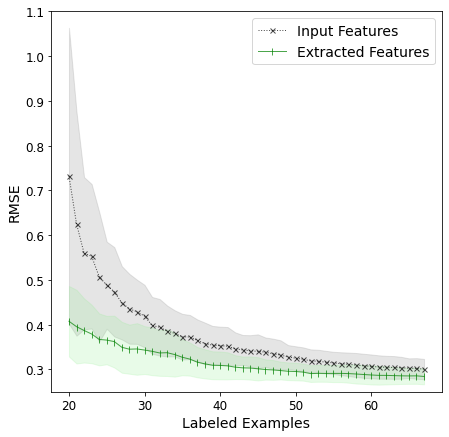

In [9]:
# Learning curves of random sampling with original and extracted features
begin = 2
mean_supervised = np.mean(supervised_results, axis=0)[begin:]
mean_semisupervised = np.mean(semisupervised_results, axis=0)[begin:]
plt.figure(figsize=(7, 7))  # for paper size 8, 7
custom_ticks = np.arange(df.shape[1]+begin, budget, step=1)
xaxis = np.arange(0, len(mean_supervised))
rnd_ucl = np.mean(supervised_results, axis=0)[begin:] + 1 * np.std(supervised_results, axis=0)[begin:]
rnd_lcl = np.mean(supervised_results, axis=0)[begin:] - 1 * np.std(supervised_results, axis=0)[begin:]
act_ucl = np.mean(semisupervised_results, axis=0)[begin:] + 1 * np.std(semisupervised_results, axis=0)[begin:]
act_lcl = np.mean(semisupervised_results, axis=0)[begin:] - 1 * np.std(semisupervised_results, axis=0)[begin:]
plt.plot(custom_ticks, mean_supervised, color='k', ls=":", marker="x", markersize=5, linewidth=1, alpha=0.7,
         label="Input Features")
plt.plot(custom_ticks, mean_semisupervised, color='g', ls="-", marker="|", markersize=7, linewidth=1, alpha=0.7,
         label="Extracted Features")
plt.fill_between(custom_ticks, rnd_ucl.reshape(-1,), rnd_lcl.reshape(-1,), color="gray", alpha=0.2)
plt.fill_between(custom_ticks, act_ucl.reshape(-1,), act_lcl.reshape(-1,), color="lightgreen", alpha=0.2)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Labeled Examples", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.grid(False)
plt.yticks(fontsize=12)
plt.ylim(0.25, 1.1)
plt.xticks(np.arange(df.shape[1]+begin, budget, step=10), fontsize=12)

## Active learning

In [10]:
# Running active learning methods
RND = random_sampling(data=df_oae, reps=simulation_runs, n_obs_test=test_size, n_obs_val=val_size, min_size=labels,
                      max_size=budget, seeds=list_seeds, alpha=alpha)
HOT = t2_sampling(data=df_oae, reps=simulation_runs, n_obs_test=test_size, n_obs_val=val_size, min_size=labels,
                  max_size=budget, seeds=list_seeds, alpha=alpha)
QBC = qbc_sampling(data=df_oae, reps=simulation_runs, n_obs_test=test_size, n_obs_val=val_size, min_size=labels,
                   max_size=budget, seeds=list_seeds, alpha=alpha)
EMC = emc_sampling(data=df_oae, reps=simulation_runs, n_obs_test=test_size, n_obs_val=val_size, min_size=labels,
                   max_size=budget, seeds=list_seeds, alpha=alpha)

([<matplotlib.axis.XTick at 0x7faac03d52e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

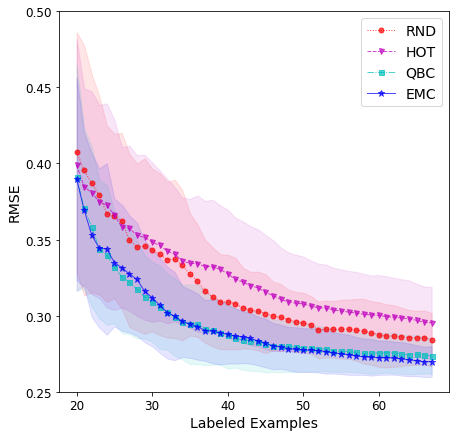

In [11]:
# Learning curves of active learning with extracted features
begin = 2
mean_RND = np.mean(RND, axis=0)[begin:]
mean_HOT = np.mean(HOT, axis=0)[begin:]
mean_QBC = np.mean(QBC, axis=0)[begin:]
mean_EMC = np.mean(EMC, axis=0)[begin:]
plt.figure(figsize=(7, 7))
custom_ticks = np.arange(df.shape[1]+begin, budget, step=1)
# xaxis = np.arange(0, len(mean_RAND))
rnd_ucl = np.mean(RND, axis=0)[begin:] + 1 * np.std(RND, axis=0)[begin:]
rnd_lcl = np.mean(RND, axis=0)[begin:] - 1 * np.std(RND, axis=0)[begin:]
hot_ucl = np.mean(HOT, axis=0)[begin:] + 1 * np.std(HOT, axis=0)[begin:]
hot_lcl = np.mean(HOT, axis=0)[begin:] - 1 * np.std(HOT, axis=0)[begin:]
qbc_ucl = np.mean(QBC, axis=0)[begin:] + 1 * np.std(QBC, axis=0)[begin:]
qbc_lcl = np.mean(QBC, axis=0)[begin:] - 1 * np.std(QBC, axis=0)[begin:]
emc_ucl = np.mean(EMC, axis=0)[begin:] + 1 * np.std(EMC, axis=0)[begin:]
emc_lcl = np.mean(EMC, axis=0)[begin:] - 1 * np.std(EMC, axis=0)[begin:]
plt.plot(custom_ticks, mean_RND, color='r', ls=":", marker="o", markersize=5, linewidth=1, alpha=0.7, label="RND")
plt.plot(custom_ticks, mean_HOT, color='m', ls="--", marker="v", markersize=5, linewidth=1, alpha=0.7, label="HOT")
plt.plot(custom_ticks, mean_QBC, color='c', ls="-.", marker="s", markersize=5, linewidth=1, alpha=0.7, label="QBC")
plt.plot(custom_ticks, mean_EMC, color='b', ls="-", marker="*", markersize=7, linewidth=1, alpha=0.7, label="EMC")
plt.fill_between(custom_ticks, rnd_ucl.reshape(-1,), rnd_lcl.reshape(-1,), color="r", alpha=0.1)
plt.fill_between(custom_ticks, hot_ucl.reshape(-1,), hot_lcl.reshape(-1,), color="m", alpha=0.1)
plt.fill_between(custom_ticks, qbc_ucl.reshape(-1,), qbc_lcl.reshape(-1,), color="c", alpha=0.1)
plt.fill_between(custom_ticks, emc_ucl.reshape(-1,), emc_lcl.reshape(-1,), color="b", alpha=0.1)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Labeled Examples", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.ylim(0.25, 0.5)
plt.grid(False)
plt.yticks(fontsize=12)
plt.xticks(np.arange(df.shape[1]+begin, budget, step=10), fontsize=12)